In [1]:
%pip install pandas numpy matplotlib tensorflow seaborn keras scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
#import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import keras
import os


In [3]:
#loading the datasets, cifar10 contains 50k training and 10k testing images
from keras.datasets import cifar10
from keras.models import Sequential #build neural networks layer by layer
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras.layers import BatchNormalization
from sklearn.metrics import confusion_matrix


(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
y_test.shape

(10000, 1)

In [6]:
X_test.shape

(10000, 32, 32, 3)

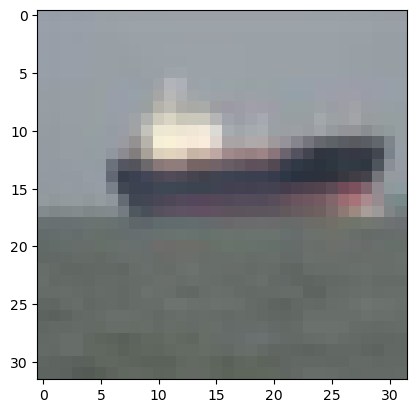

In [7]:
#image visualization
plt.imshow(X_train[69])
plt.show()

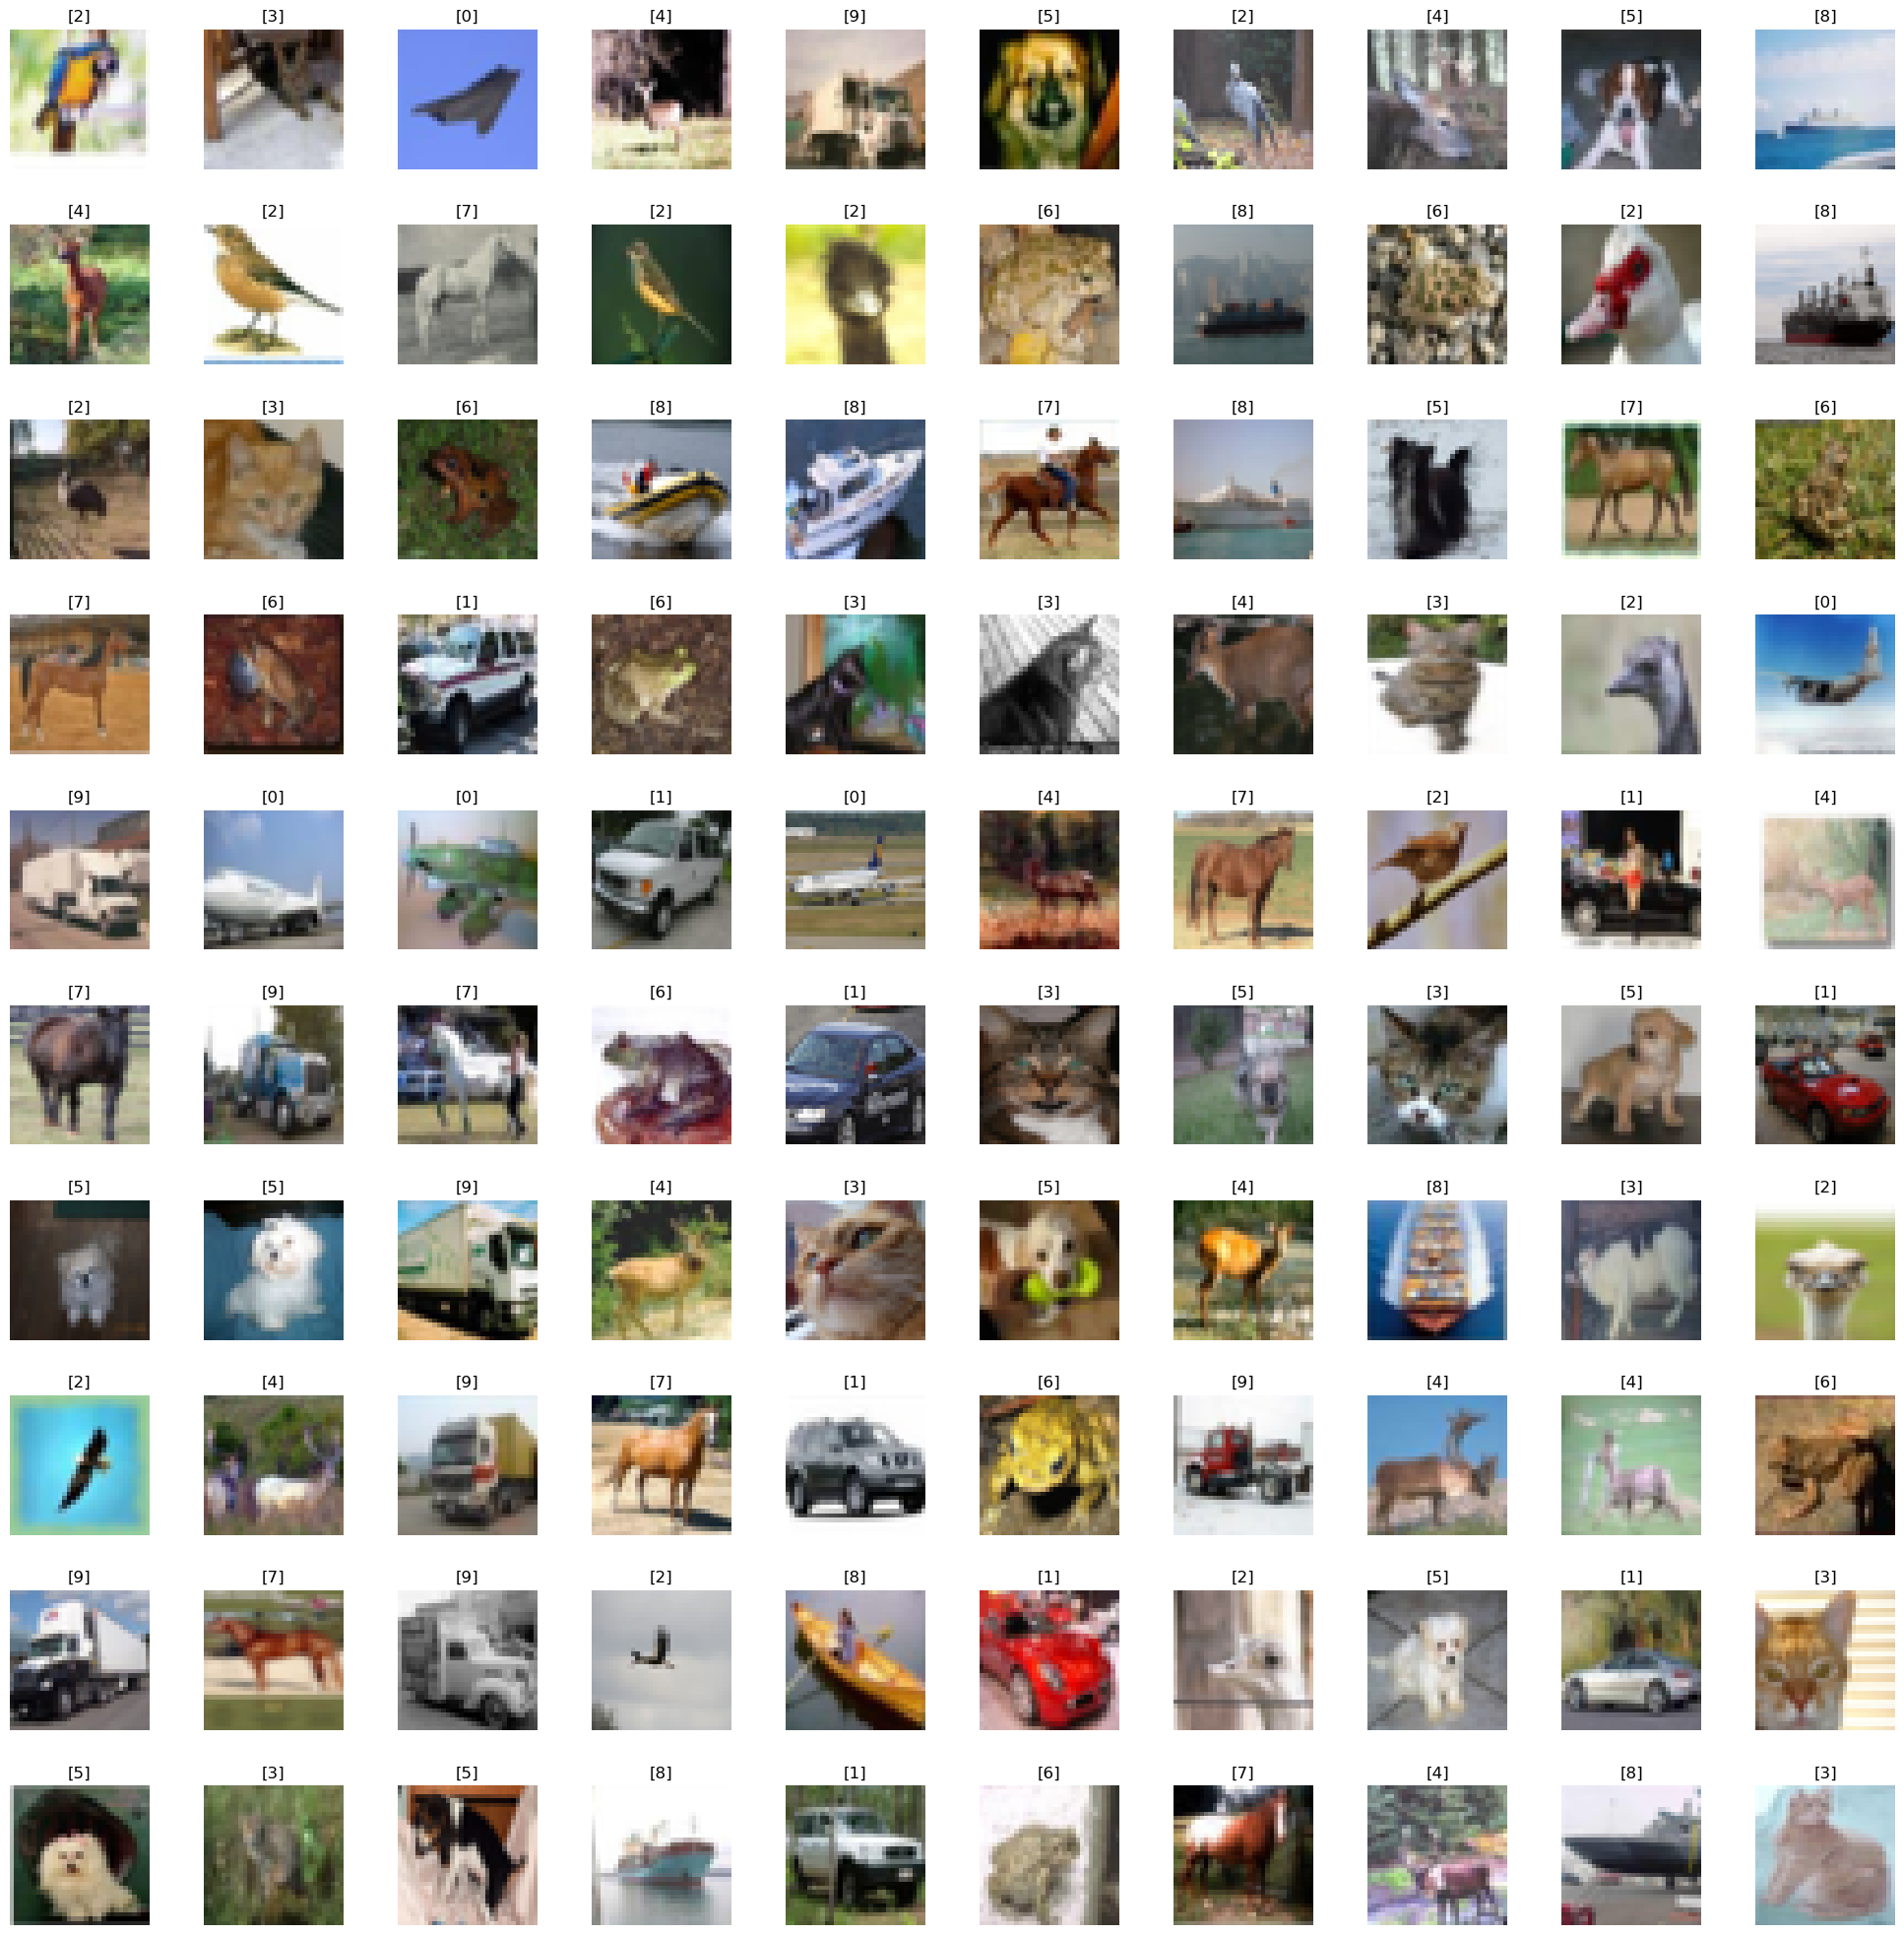

In [8]:
width_grid = 10
length_grid = 10

fig, axes = plt.subplots(length_grid, width_grid, figsize = (25,25))
axes = axes.ravel() #used to simplify the iteration process so don't need to iterate over 2D arrays

n_training = len(X_train)

for i in np.arange(0, length_grid * width_grid):
    index = np.random.randint(0, n_training) #picks a random # between 0 and 50k
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)

In [9]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [10]:
number_category = 10

In [11]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [12]:
#categorize the classes into arrays
y_train = keras.utils.to_categorical(y_train, number_category)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [13]:
y_test = keras.utils.to_categorical(y_test, number_category)
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [14]:
X_train = X_train/255
X_test= X_test/255

In [15]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [16]:
#take out number of images
Input_shape = X_train.shape[1:]
Input_shape

(32, 32, 3)

In [17]:
#Training the model cnn
cnn_model = Sequential()
cnn_model.add(Conv2D(64, (3,3), activation='relu', input_shape=Input_shape))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(64, (3,3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dense(units = 10, activation = 'softmax')) #output layer

cnn_model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001), metrics = ['accuracy'])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs =40, shuffle = True)

Epoch 1/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 115s 73ms/step - accuracy: 0.3245 - loss: 1.8474
Epoch 2/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 129s 82ms/step - accuracy: 0.5353 - loss: 1.2937
Epoch 3/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 132s 84ms/step - accuracy: 0.6031 - loss: 1.1225
Epoch 4/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 129s 83ms/step - accuracy: 0.6453 - loss: 1.0171
Epoch 5/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 128s 82ms/step - accuracy: 0.6790 - loss: 0.9242
Epoch 6/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 128s 82ms/step - accuracy: 0.6976 - loss: 0.8709
Epoch 7/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 130s 83ms/step - accuracy: 0.7149 - loss: 0.8217
Epoch 8/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 128s 82ms/step - accuracy: 0.7332 - loss: 0.7778
Epoch 9/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 130s 83ms/step - accuracy: 0.7494 - loss: 0.7369
Epoch 10/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 136s 87ms/step - accuracy: 0.7507 - loss: 0.7186
Epoch 11/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 90ms/step - accuracy: 0.7572 - loss: 0.70

In [19]:
#Evalutating the models
evaluation = cnn_model.evaluate(X_test, y_test)
print("Test Accuracy: {}".format(evaluation[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.7744 - loss: 0.7066
Test Accuracy: 0.7730000019073486


In [20]:
predicted_classes = cnn_model.predict(X_test) 
predicted_classes = np.argmax(predicted_classes, axis=1)
predicted_classes

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step


array([6, 8, 8, ..., 5, 1, 7])

In [21]:
y_test_labels = y_test.argmax(1)
y_test_labels

array([3, 8, 8, ..., 5, 1, 7])

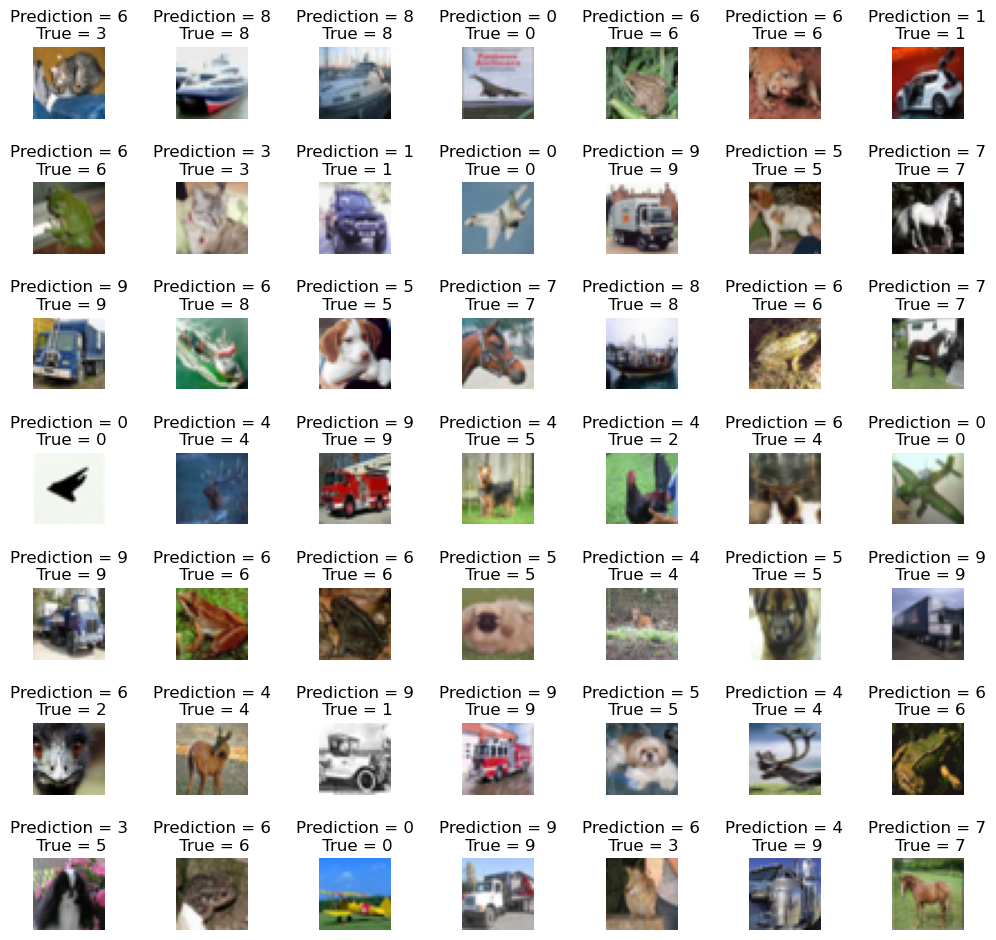

In [22]:
L= 7
W=7
fig, axes = plt.subplots(L,W,figsize=(12,12))
axes= axes.ravel()
for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test_labels[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 1)

y_test_labels shape: (10000,)
predicted_classes shape: (10000,)


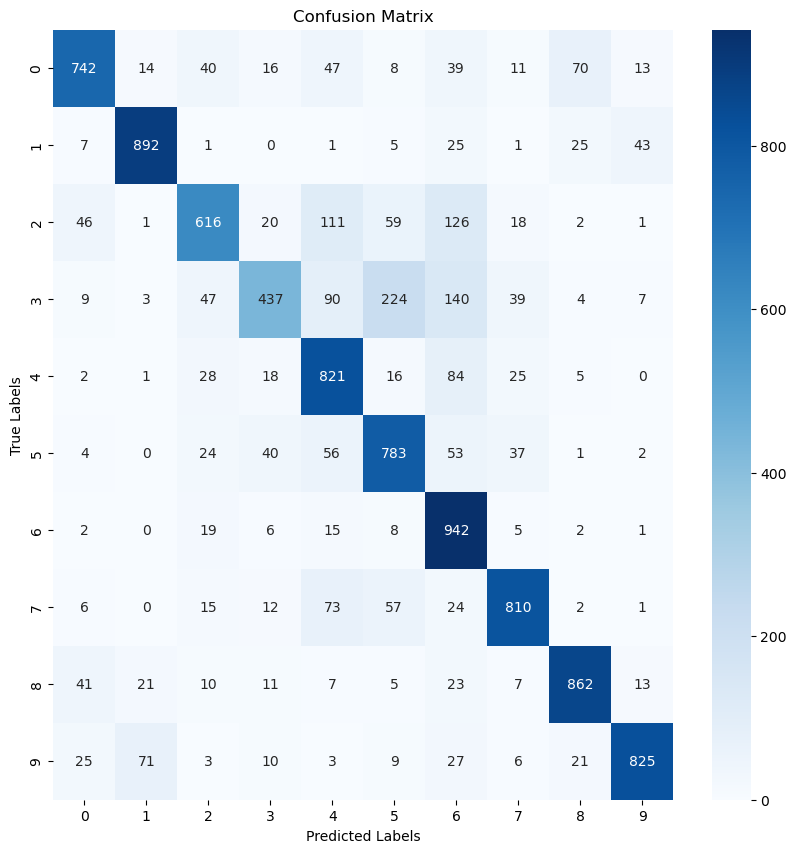

In [23]:

print(f'y_test_labels shape: {y_test_labels.shape}')       
print(f'predicted_classes shape: {predicted_classes.shape}') 

cm = confusion_matrix(y_test_labels, predicted_classes)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')  
plt.ylabel('True Labels')       
plt.title('Confusion Matrix')
plt.show()

In [24]:
#saving model
dir = os.path.join(os.getcwd(), 'saved_models')
if not os.path.isdir(dir):
    os.makedirs(dir)
model_path = os.path.join(dir, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

# MODEL TRAINING USING AUGEMENTED DATASET


In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,          
    width_shift_range=0.1,
    height_shift_range=0.1,    
    horizontal_flip=True,
    vertical_flip=False,        
    zoom_range=0.2,             
    shear_range=0.2             
)

In [27]:
datagen.fit(X_train)

In [28]:
history_aug = cnn_model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=50)

Epoch 1/50
   2/1563 ━━━━━━━━━━━━━━━━━━━━ 1:47 69ms/step - accuracy: 0.6562 - loss: 1.5214  

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 188s 120ms/step - accuracy: 0.6502 - loss: 1.0770
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 181s 116ms/step - accuracy: 0.6551 - loss: 1.0616
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 184s 118ms/step - accuracy: 0.6561 - loss: 1.0537
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 187s 120ms/step - accuracy: 0.6570 - loss: 1.0493
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 191s 122ms/step - accuracy: 0.6532 - loss: 1.0503
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 188s 120ms/step - accuracy: 0.6541 - loss: 1.0531
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 189s 121ms/step - accuracy: 0.6584 - loss: 1.0561
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 186s 119ms/step - accuracy: 0.6586 - loss: 1.0578
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 203s 130ms/step - accuracy: 0.6523 - loss: 1.0682
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 185s 119ms/step - accuracy: 0.6584 - loss: 1.0455
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 161s 103ms/step - accuracy: 0.6525 - loss: 1.06

In [29]:
X_test.shape

(10000, 32, 32, 3)

In [30]:
y_test.shape

(10000, 10)

In [31]:
#Evalutating the models
evaluation = cnn_model.evaluate(X_test, y_test)
print("Test Accuracy: {}".format(evaluation[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.5918 - loss: 1.3631
Test Accuracy: 0.5888000130653381


In [32]:
# Generate a batch of augmented images for visualization
batch_size = 49  
augmented_iterator = datagen.flow(X_train, y_train, batch_size=batch_size, shuffle=False)
augmented_images, augmented_labels = next(augmented_iterator)
augmented_labels_int = np.argmax(augmented_labels, axis=1)

In [33]:
augmented_predictions = cnn_model.predict(augmented_images)
augmented_pred_classes = np.argmax(augmented_predictions, axis=1)
augmented_pred_classes

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


array([6, 9, 3, 4, 1, 3, 6, 7, 8, 3, 4, 7, 7, 3, 3, 3, 3, 3, 6, 6, 3, 3,
       6, 6, 2, 3, 3, 7, 7, 3, 3, 3, 3, 3, 4, 3, 3, 7, 8, 6, 5, 2, 2, 7,
       3, 3, 3, 4, 2])

In [34]:
y_test_labels = y_test.argmax(1)
y_test_labels

array([3, 8, 8, ..., 5, 1, 7])

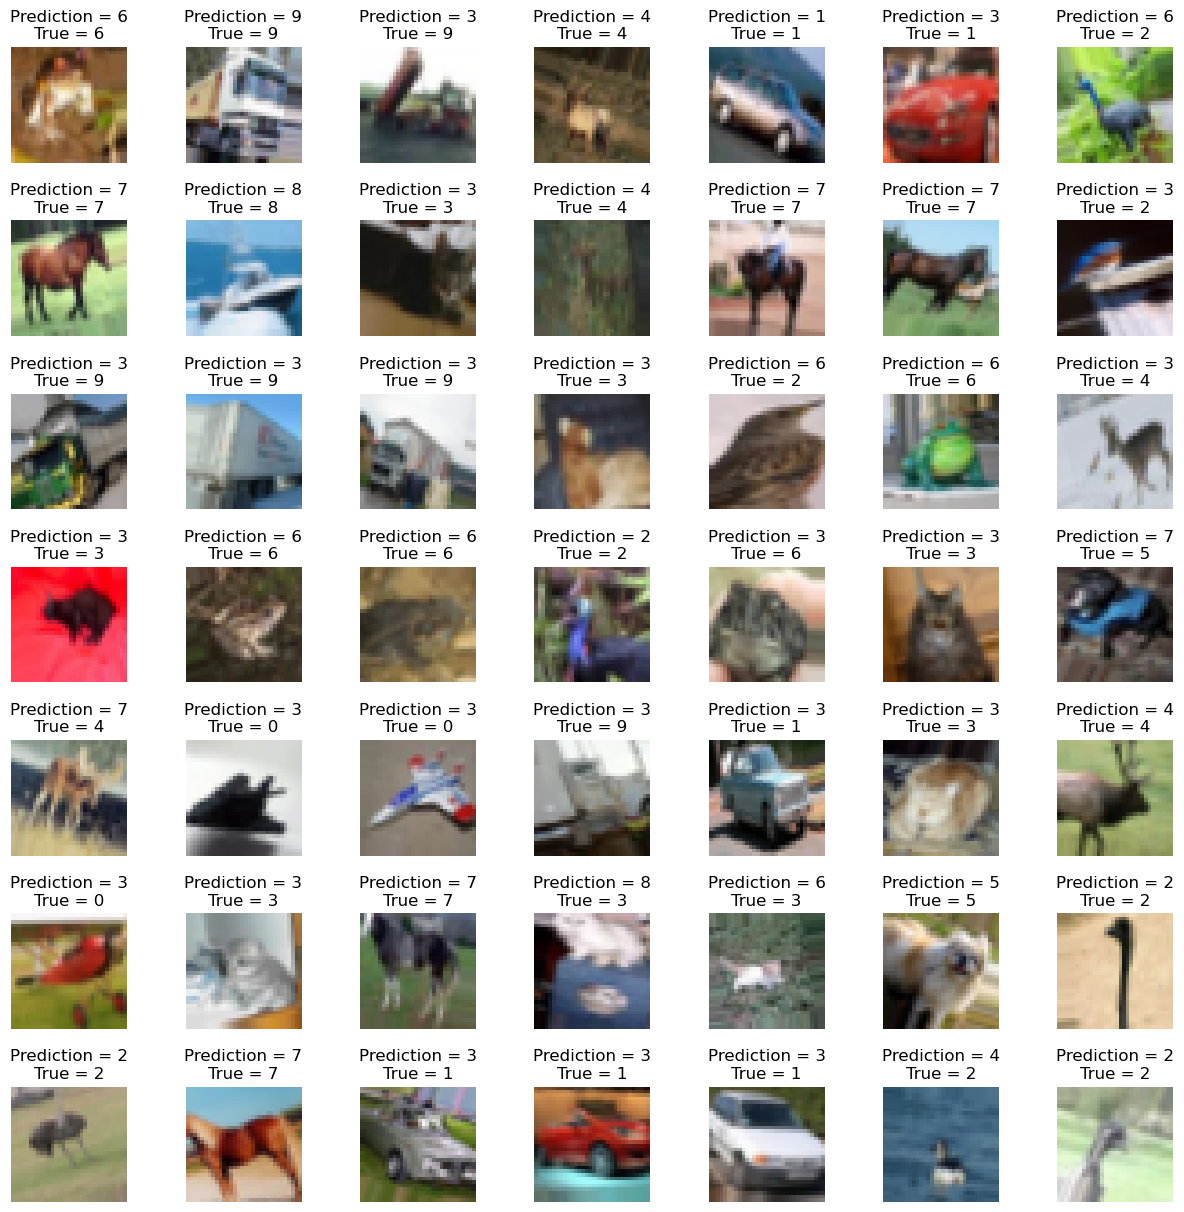

In [35]:
L, W = 7, 7 
fig, axes = plt.subplots(L, W, figsize=(15, 15))
axes = axes.ravel()

for i in range(L * W):
    axes[i].imshow(augmented_images[i])
    axes[i].set_title('Prediction = {}\nTrue = {}'.format(augmented_pred_classes[i], augmented_labels_int[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

In [36]:
#saving model
dir = os.path.join(os.getcwd(), 'saved_models')
if not os.path.isdir(dir):
    os.makedirs(dir)
model_path = os.path.join(dir, 'keras_cifar10_trained_model_augmented.h5')
cnn_model.save(model_path)